Genauigkeit: 1.0


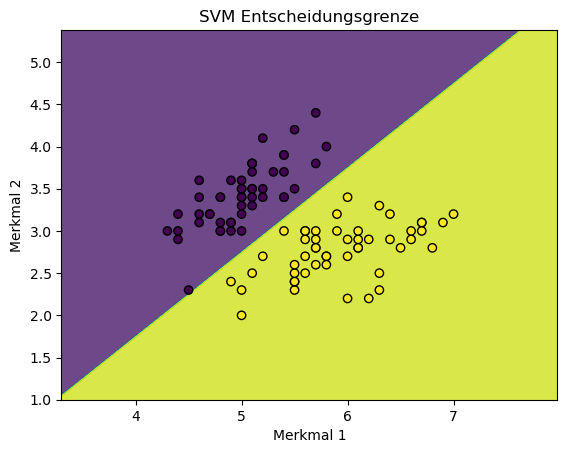

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Beispiel-Datensatz laden (Iris)
iris = datasets.load_iris()
input_data = iris.data[:, :2]  # Nur die ersten zwei Merkmale (zur Visualisierung)
output_data = iris.target

# Nur zwei Klassen verwenden (z. B. Klasse 0 und 1)
input_data = input_data[output_data != 2]
output_data = output_data[output_data != 2]

# Daten aufteilen
input_data_train, input_data_test, output_data_train, output_data_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# SVM-Modell erstellen
model = SVC(kernel='linear')  # Linearer Kernel
model.fit(input_data_train, output_data_train)

# Genauigkeit anzeigen
print("Genauigkeit:", model.score(input_data_test, output_data_test))

# Entscheidungslinie visualisieren
import numpy as np

def plot_decision_boundary(model, input_data, output_data):
    h = .02
    x_min, x_max = input_data[:, 0].min() - 1, input_data[:, 0].max() + 1
    y_min, y_max = input_data[:, 1].min() - 1, input_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(input_data[:, 0], input_data[:, 1], c=output_data, edgecolors='k')
    plt.xlabel("Merkmal 1")
    plt.ylabel("Merkmal 2")
    plt.title("SVM Entscheidungsgrenze")
    plt.show()

plot_decision_boundary(model, input_data, output_data)